#comparision


In [ ]:
!pip install yfinance
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 31.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████

In [ ]:
import pandas_datareader as pdr
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import warnings

warnings.filterwarnings("default")
import datetime
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:

# Set up End and Start to get data


end = datetime.now()
start ='1996-01-01'

globals()["HINDUSTAN_UNILIVER"] = yf.download('HINDUNILVR.NS',start, end)
globals()["BRITANNIA"]= yf.download("BRITANNIA.NS", start, end)
globals()["RELIANCE"]= yf.download("RELIANCE.NS", start, end)
globals()["ITC"]= yf.download("ITC.NS",start, end)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
ITC.head()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1996-01-01  5.550000  5.600000  5.533333  5.583333   3.376327    985500
1996-01-02  5.466666  5.566666  5.288888  5.372222   3.248665   7470000
1996-01-03  5.133333  5.254444  5.101111  5.200000   3.144519  15160500
1996-01-04  5.200000  5.332222  5.144444  5.297777   3.203647  12397500
1996-01-05  5.297777  5.277777  5.188888  5.202222   3.145863   5008500

In [ ]:
s1=HINDUSTAN_UNILIVER[:]
s2=BRITANNIA[:]
s3=RELIANCE[:]
s4=ITC[:]

company_list=[s1,s2,s3,s4]
company_name=["HINDUSTAN_UNILIVER","BRITANNIA","RELIANCE","ITC"]

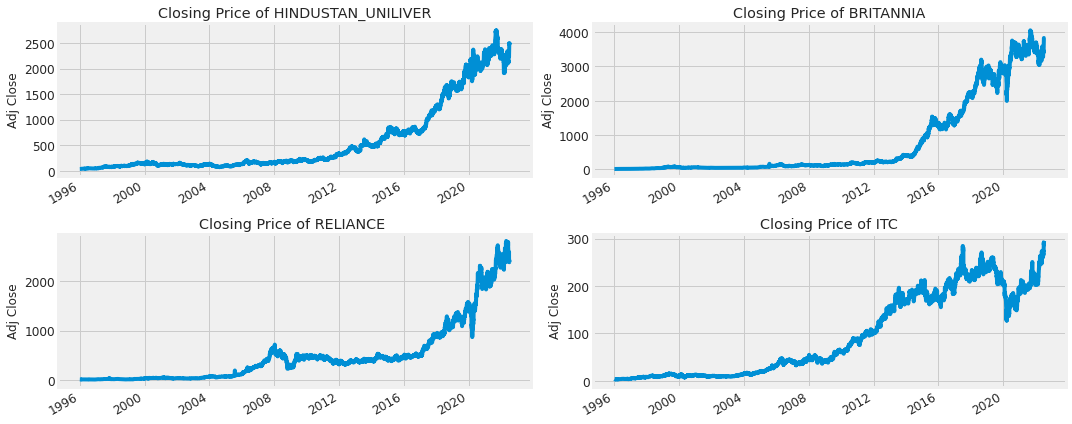

In [ ]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
HINDUSTAN_UNILIVER['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of HINDUSTAN_UNILIVER")

plt.subplot(2, 2, 2)
BRITANNIA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of BRITANNIA")

plt.subplot(2, 2, 3)
RELIANCE['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of RELIANCE ")

plt.subplot(2, 2, 4)
ITC['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of ITC")

plt.tight_layout()


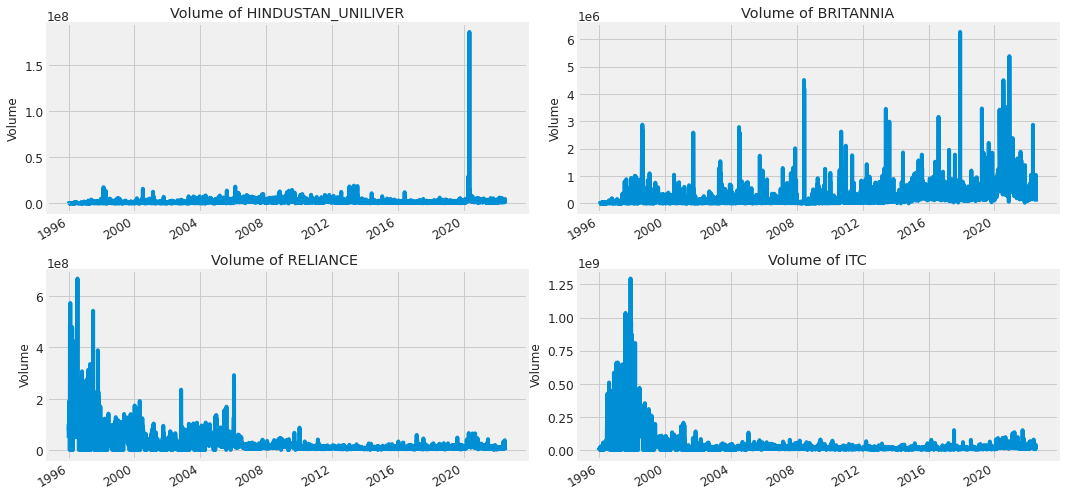

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
HINDUSTAN_UNILIVER['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of HINDUSTAN_UNILIVER")

plt.subplot(2, 2, 2)
BRITANNIA['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of BRITANNIA")

plt.subplot(2, 2, 3)
RELIANCE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of RELIANCE ")

plt.subplot(2, 2, 4)
ITC['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume of ITC")

plt.tight_layout()


In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  s1[column_name] = s1['Adj Close'].rolling(ma).mean()
  s2[column_name] = s2['Adj Close'].rolling(ma).mean()
  s3[column_name] = s3['Adj Close'].rolling(ma).mean()
  s4[column_name] = s4['Adj Close'].rolling(ma).mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

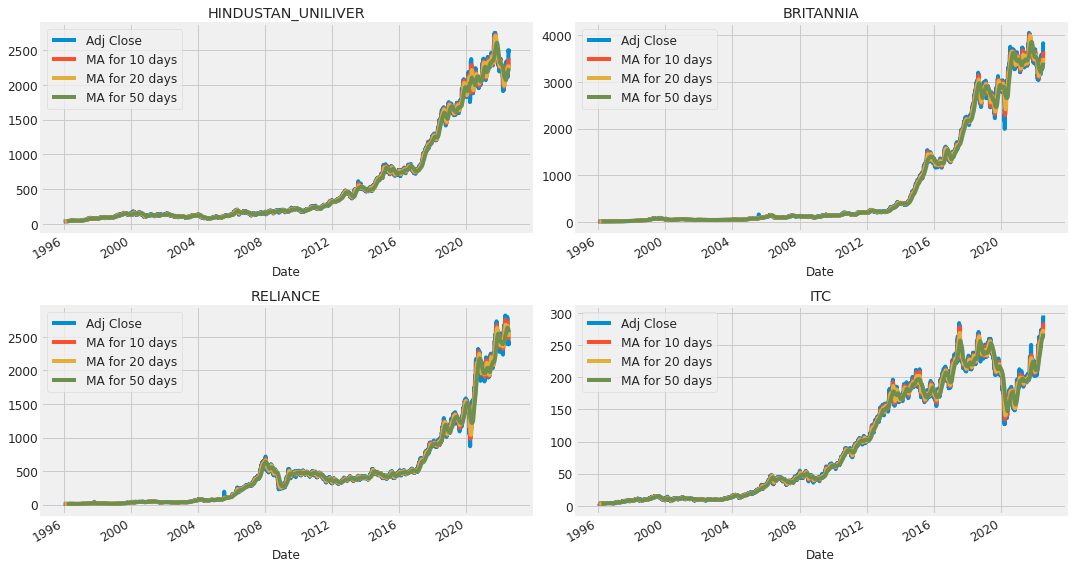

In [ ]:
#moving average
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

s1[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('HINDUSTAN_UNILIVER')

s2[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BRITANNIA')

s3[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('RELIANCE')

s4[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ITC')

fig.tight_layout()

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
org=[HINDUSTAN_UNILIVER,BRITANNIA,RELIANCE,ITC]

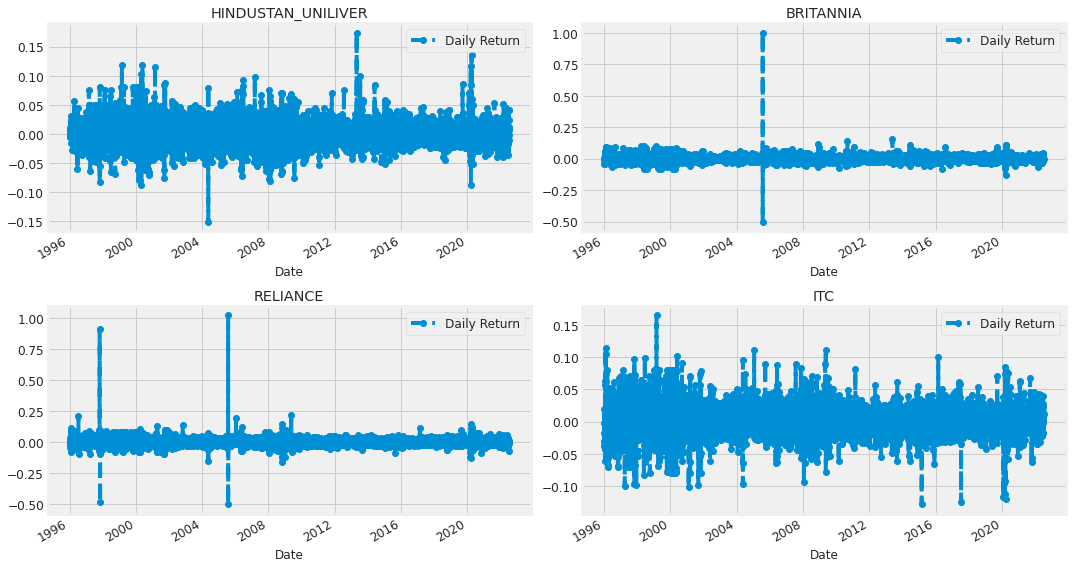

In [ ]:


# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

s1['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('HINDUSTAN_UNILIVER')

s2['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BRITANNIA')

s3['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('RELIANCE')

s4['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ITC')

fig.tight_layout()

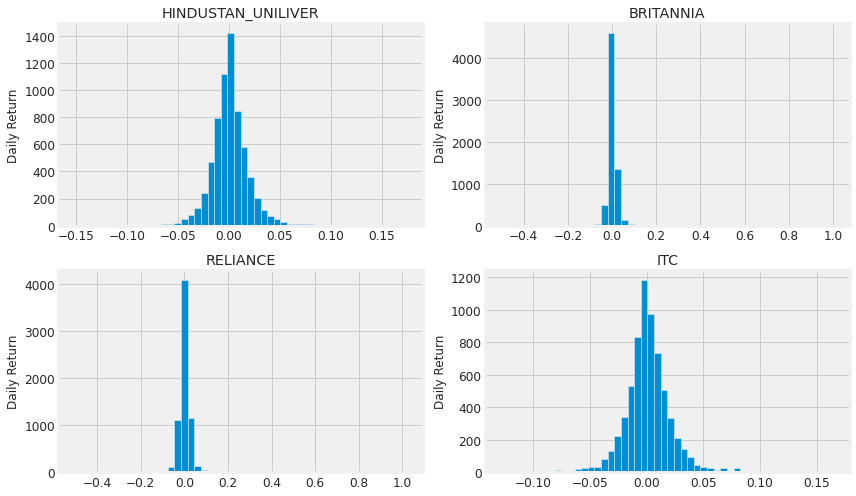

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
H_R = s1["Adj Close"].pct_change()
B_R = s2["Adj Close"].pct_change()
R_R = s3["Adj Close"].pct_change()
I_R = s4["Adj Close"].pct_change()

In [ ]:
returns = {"HINDUSTAN_UNILIVER":H_R ,"BRITANNIA": B_R ,"RELIANCE": R_R ,"ITC": I_R}

In [ ]:
returnss=df = pd.concat(returns, axis = 1)
returnss

HINDUSTAN_UNILIVER  BRITANNIA  RELIANCE       ITC
Date                                                         
1996-01-01                 NaN        NaN       NaN       NaN
1996-01-02            0.010678        NaN -0.007776 -0.037811
1996-01-03           -0.005923  -0.012579  0.007592 -0.032058
1996-01-04            0.000080   0.000000 -0.009237  0.018803
1996-01-05           -0.001610   0.000637 -0.006870 -0.018037
...                        ...        ...       ...       ...
2022-07-05            0.011073  -0.011850  0.008100 -0.017129
2022-07-06            0.040350   0.047640 -0.008795  0.008365
2022-07-07           -0.010187  -0.005364 -0.009847  0.009160
2022-07-08            0.009665   0.001758  0.001382  0.003768
2022-07-11            0.006468  -0.002004 -0.008363  0.012114

[6675 rows x 4 columns]

In [ ]:
returnss

HINDUSTAN_UNILIVER  BRITANNIA  RELIANCE       ITC
Date                                                         
1996-01-01                 NaN        NaN       NaN       NaN
1996-01-02            0.010678        NaN -0.007776 -0.037811
1996-01-03           -0.005923  -0.012579  0.007592 -0.032058
1996-01-04            0.000080   0.000000 -0.009237  0.018803
1996-01-05           -0.001610   0.000637 -0.006870 -0.018037
...                        ...        ...       ...       ...
2022-07-05            0.011073  -0.011850  0.008100 -0.017129
2022-07-06            0.040350   0.047640 -0.008795  0.008365
2022-07-07           -0.010187  -0.005364 -0.009847  0.009160
2022-07-08            0.009665   0.001758  0.001382  0.003768
2022-07-11            0.006468  -0.002004 -0.008363  0.012114

[6675 rows x 4 columns]

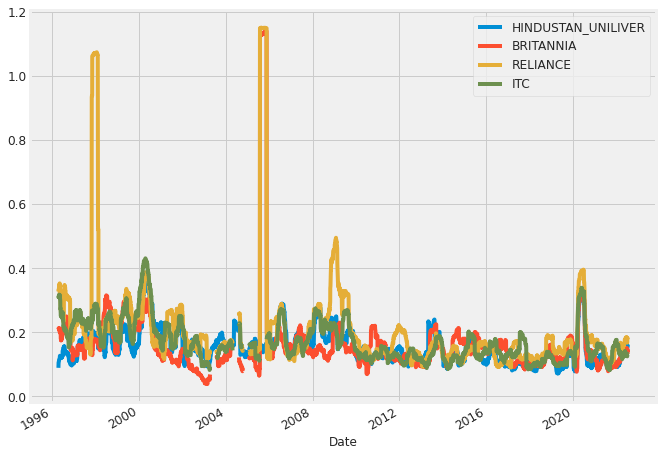

In [ ]:


min_periods = 75 


vol = returnss.rolling(min_periods).std() * np.sqrt(min_periods) 


vol.plot(figsize=(10, 8))


plt.show()

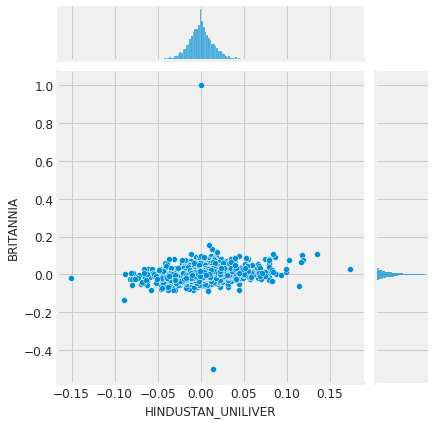

In [ ]:
sns.jointplot(x='HINDUSTAN_UNILIVER', y='BRITANNIA', data=returnss, kind='scatter')

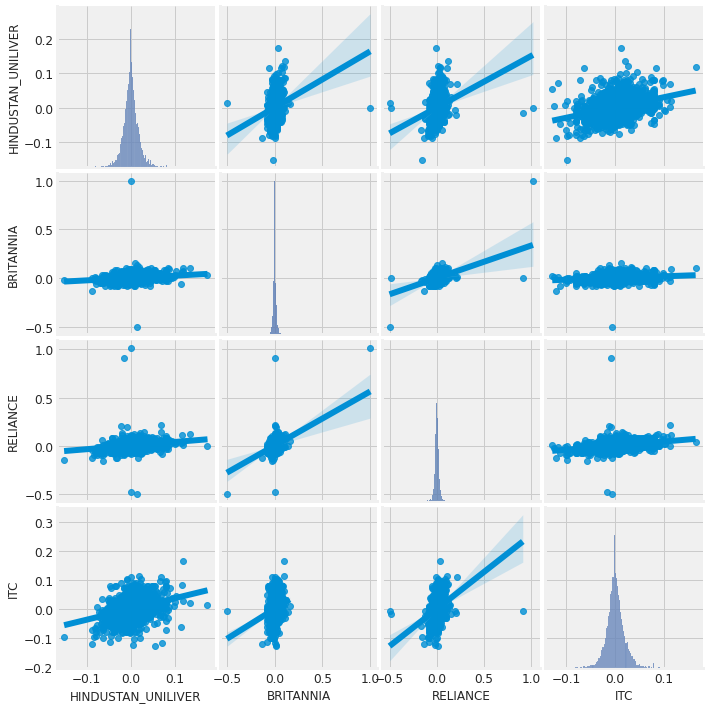

In [ ]:
sns.pairplot(returnss, kind='reg')

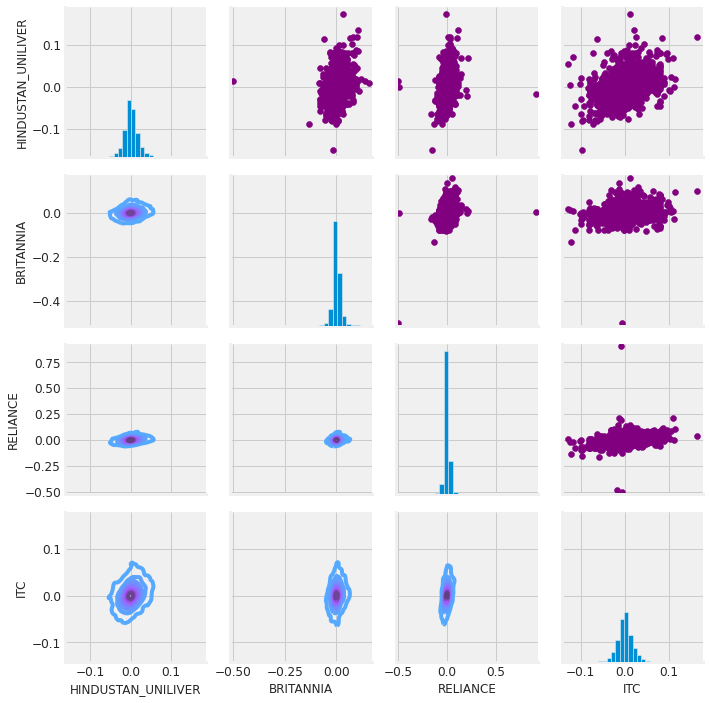

In [ ]:

return_fig = sns.PairGrid(returnss.dropna())


return_fig.map_upper(plt.scatter, color='purple')


return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

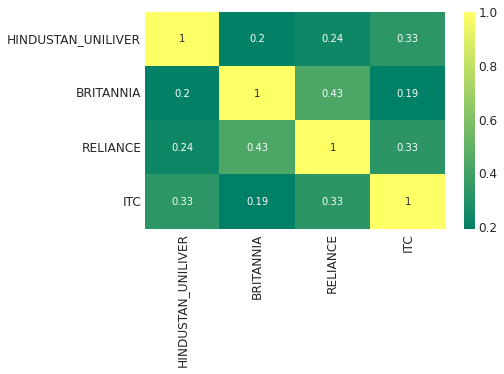

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(returnss.corr(), annot=True, cmap='summer')

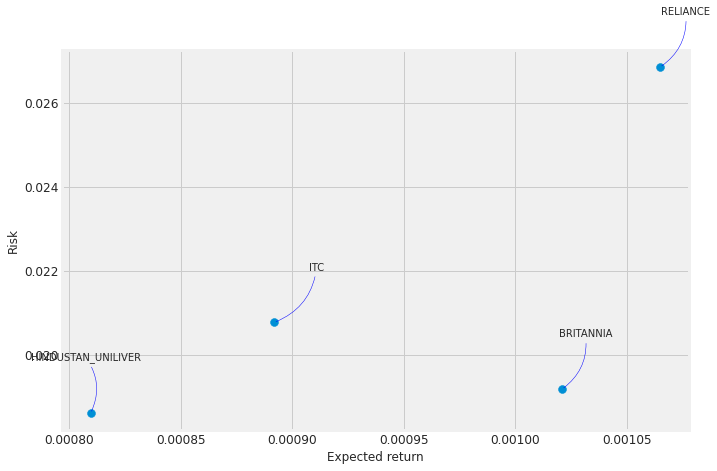

In [ ]:
rets = returnss.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#TICKER

In [ ]:
T1=yf.Ticker("HINDUNILVR.NS") 
T2=yf.Ticker("BRITANNIA.NS") 
T3=yf.Ticker("RELIANCE.NS") 
T4=yf.Ticker("ITC.NS")

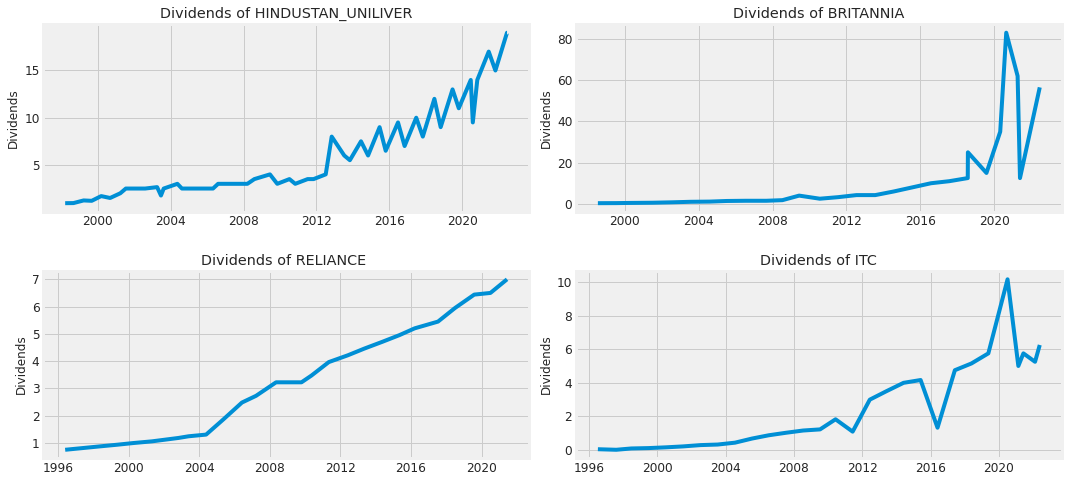

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
plt.plot(T1.dividends)
plt.ylabel('Dividends')
plt.xlabel(None)
plt.title("Dividends of HINDUSTAN_UNILIVER")

plt.subplot(2, 2, 2)
plt.plot(T2.dividends)
plt.ylabel('Dividends')
plt.xlabel(None)
plt.title("Dividends of BRITANNIA")

plt.subplot(2, 2, 3)
plt.plot(T3.dividends)
plt.ylabel('Dividends')
plt.xlabel(None)
plt.title("Dividends of RELIANCE ")

plt.subplot(2, 2, 4)
plt.plot(T4.dividends)
plt.ylabel('Dividends')
plt.xlabel(None)
plt.title("Dividends of ITC")

plt.tight_layout()


In [ ]:
len(T1.dividends)

53

In [ ]:
print(T1.major_holders)
print(T2.major_holders)
print(T3.major_holders)
print(T4.major_holders)

        0                                      1
0  62.13%        % of Shares Held by All Insider
1  16.58%       % of Shares Held by Institutions
2  43.80%        % of Float Held by Institutions
3     276  Number of Institutions Holding Shares
        0                                      1
0  50.55%        % of Shares Held by All Insider
1  23.42%       % of Shares Held by Institutions
2  47.36%        % of Float Held by Institutions
3     182  Number of Institutions Holding Shares
        0                                      1
0  49.66%        % of Shares Held by All Insider
1  25.73%       % of Shares Held by Institutions
2  51.11%        % of Float Held by Institutions
3     390  Number of Institutions Holding Shares
        0                                      1
0  32.11%        % of Shares Held by All Insider
1  43.23%       % of Shares Held by Institutions
2  63.68%        % of Float Held by Institutions
3     192  Number of Institutions Holding Shares


In [ ]:
marcap=[T1.info["marketCap"],T2.info["marketCap"],T3.info["marketCap"],T4.info["marketCap"]]
PE = [T1.info["forwardPE"],T2.info["forwardPE"],T3.info["forwardPE"],T4.info["forwardPE"]]
EPS=[T1.info["forwardEps"],T2.info["forwardEps"],T3.info["forwardEps"],T4.info["forwardEps"]]
PTB=[T1.info["priceToBook"],T2.info["priceToBook"],T3.info["priceToBook"],T4.info["priceToBook"]]
dirate=[T1.info["dividendRate"],T2.info["dividendRate"],T3.info["dividendRate"],T4.info["dividendRate"]]
divyield=[T1.info["dividendYield"],T2.info["dividendYield"],T3.info["dividendYield"],T4.info["dividendYield"]]
ebita=[T1.info["ebitdaMargins"],T2.info["ebitdaMargins"],T3.info["ebitdaMargins"],T4.info["ebitdaMargins"]]
pmargin=[T1.info["profitMargins"],T2.info["profitMargins"],T3.info["profitMargins"],T4.info["profitMargins"]]
cr=[T1.info["currentRatio"],T2.info["currentRatio"],T3.info["currentRatio"],T4.info["currentRatio"]]

In [ ]:
data={"MarketCapital":marcap,"Price–earnings ratio":PE,"Earning per share":EPS,"Price to book":PTB,"Dividend Rate":dirate,"Dividend Yield":divyield,"ebita margin":ebita,"profit margin":pmargin,"current ratio":cr}

In [ ]:
infolist = pd.DataFrame(data,index=["HINDUSTAN_UNILIVER","BRITANNIA","RELIANCE","ITC"])


In [ ]:

infolist

MarketCapital  Price–earnings ratio  Earning per share  \
HINDUSTAN_UNILIVER   5872042377216             66.070000              37.79   
BRITANNIA             919381082112             46.908566              81.37   
RELIANCE            16180187234304             33.283230              71.85   
ITC                  3618346631168             19.641420              14.92   

                    Price to book  Dividend Rate  Dividend Yield  \
HINDUSTAN_UNILIVER      11.957693           34.0          0.0137   
BRITANNIA               35.940132           56.5          0.0148   
RELIANCE                 2.112109            7.0          0.0027   
ITC                      5.782246           11.5          0.0392   

                    ebita margin  profit margin  current ratio  
HINDUSTAN_UNILIVER       0.23657        0.16930          1.376  
BRITANNIA                0.15591        0.10819          0.955  
RELIANCE                 0.15483        0.08990            NaN  
ITC                      0.33758        0.25125          2.814

In [ ]:
(infolist.T).style.format("{:.5f}")

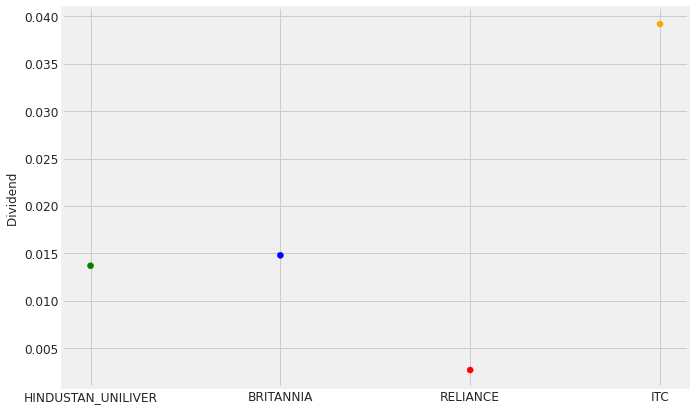

In [ ]:
x=["HINDUSTAN_UNILIVER","BRITANNIA","RELIANCE","ITC"]
fig = plt.figure(figsize =(10, 7))
plt.scatter(x,infolist["Dividend Yield"],c=("green","blue","red","orange"))
plt.ylabel("Dividend ")

plt.show()

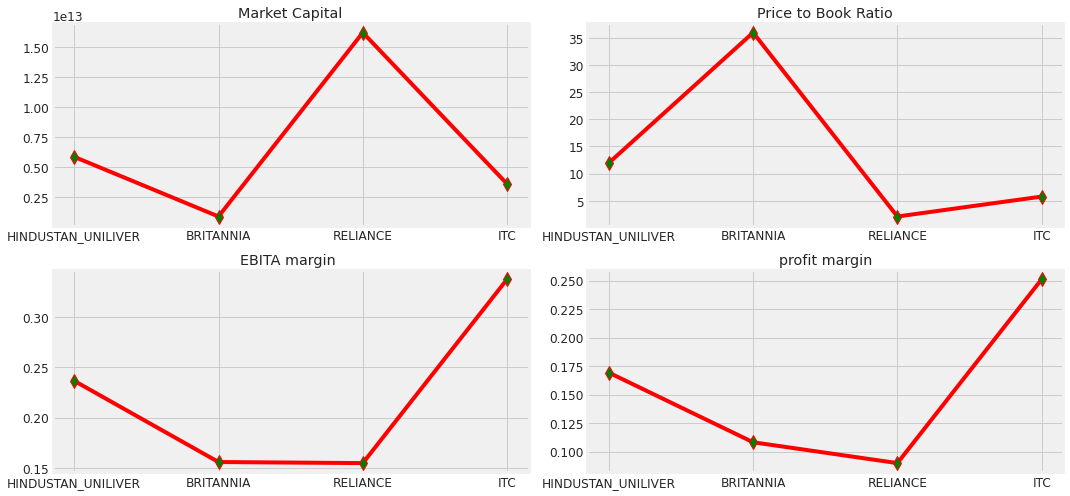

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2, 1)
plt.plot(infolist["MarketCapital"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("Market Capital")

plt.subplot(2, 2, 2)
plt.plot(infolist["Price to book"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("Price to Book Ratio")

plt.subplot(2, 2, 3)
plt.plot(infolist["ebita margin"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("EBITA margin ")

plt.subplot(2, 2, 4)
plt.plot(infolist["profit margin"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("profit margin")

plt.tight_layout()


Text(0.5, 1.0, 'Earning per share')

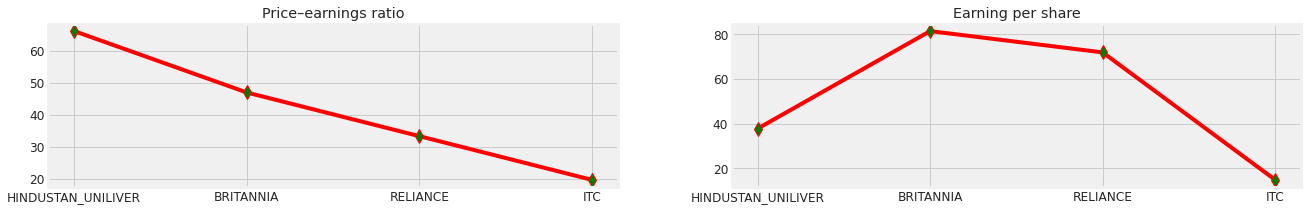

In [ ]:
plt.figure(figsize=(20,100))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2,1)
plt.plot(infolist["Price–earnings ratio"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("Price–earnings ratio")

plt.subplot(2, 2,2)
plt.plot(infolist["Earning per share"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("Earning per share")

In [ ]:
T1.cashflow.style.format("{:.1f}")

In [ ]:
T2.cashflow.T.style.format("{:.1f}")

In [ ]:
T3.cashflow.T.style.format("{:.1f}")

In [ ]:
T4.cashflow.T.style.format("{:.1f}")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


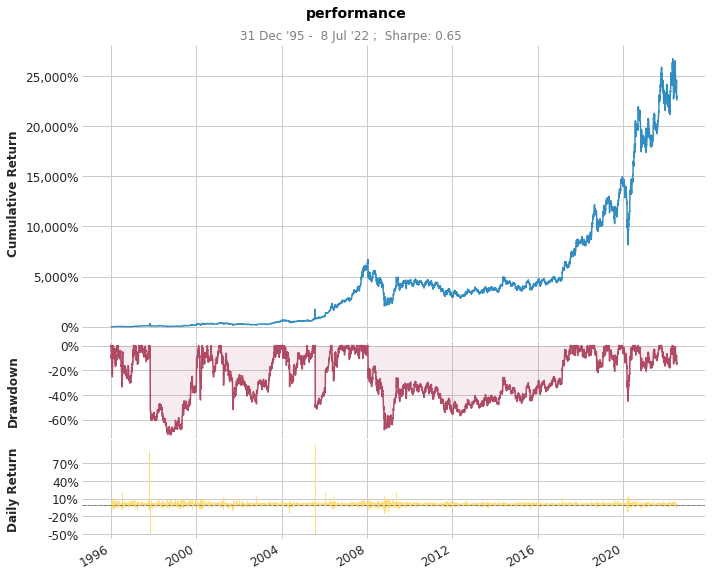

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               1996-01-01
End Period                 2022-07-08
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          22,654.57%
CAGR﹪                     22.7%

Sharpe                     0.65
Prob. Sharpe Ratio         99.99%
Smart Sharpe               0.61
Sortino                    1.12
Smart Sortino              1.04
Sortino/√2                 0.79
Smart Sortino/√2           0.74
Omega                      1.16

Max Drawdown               -72.44%
Longest DD Days            3461
Volatility (ann.)          46.98%
Calmar                     0.31
Skew                       9.3
Kurtosis                   368.05

Expected Daily %           0.08%
Expected Monthly %         1.72%
Expected Yearly %          22.26%
Kelly Criterion            7.13%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.75%
Expected Shortfall (cVaR)  -4.75%

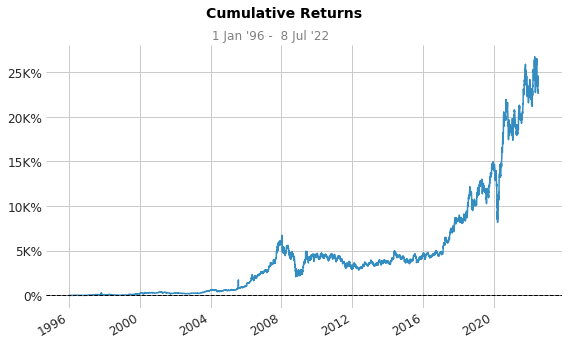

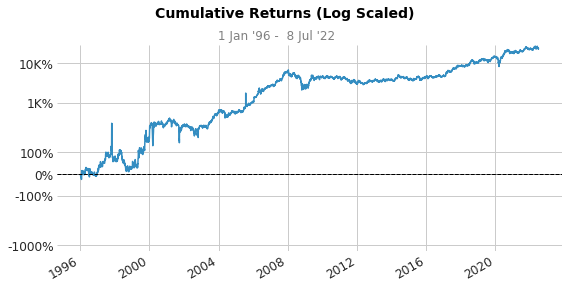

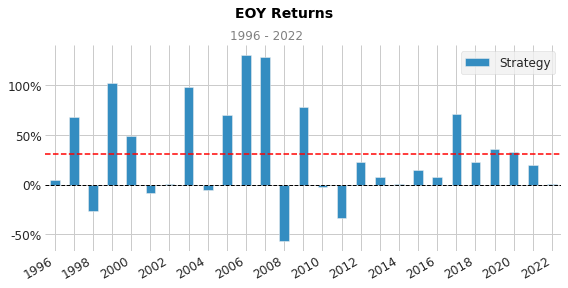

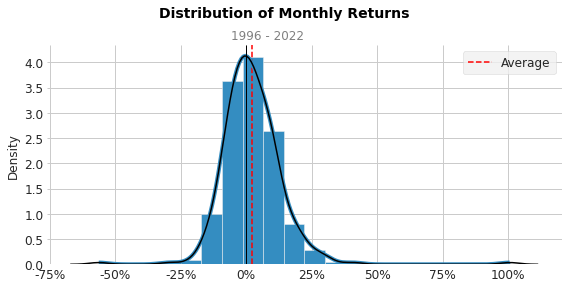

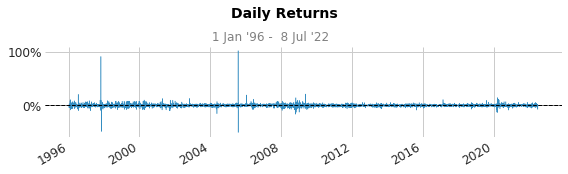

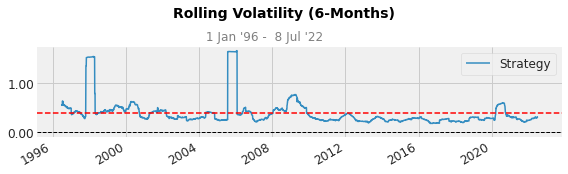

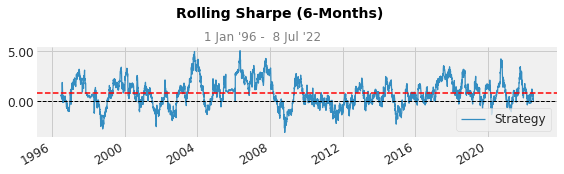

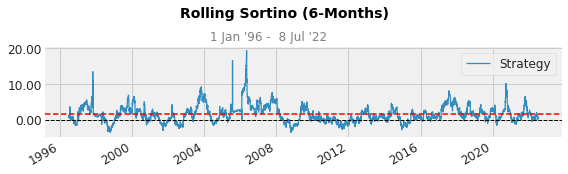

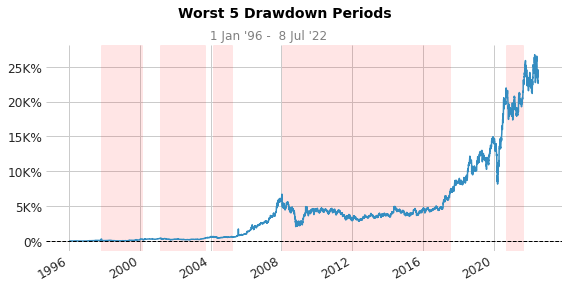

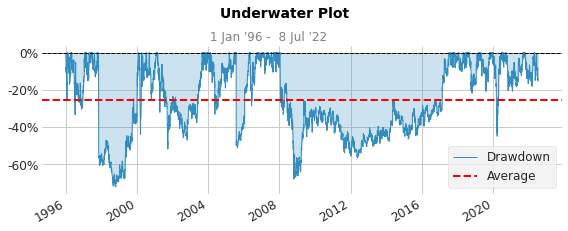

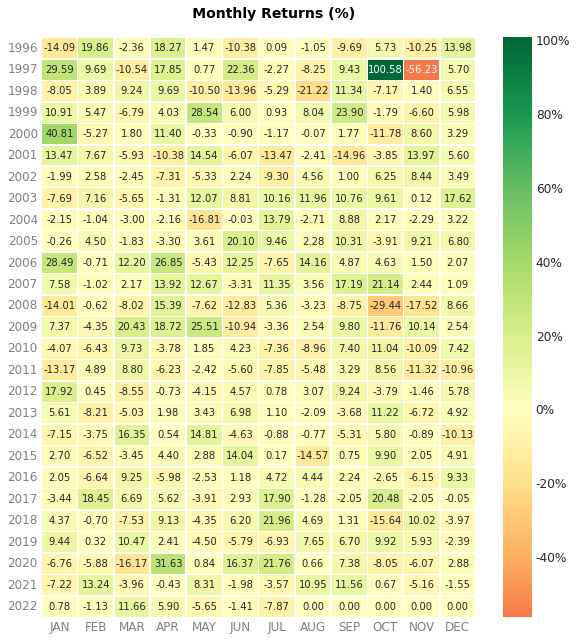

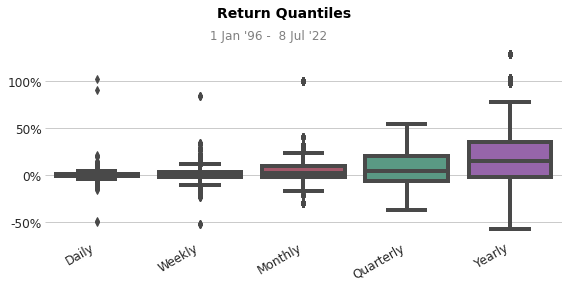

In [ ]:
stocks1= qs.utils.download_returns("RELIANCE.NS")
qs.plots.snapshot(stocks1,title="performance")
qs.reports.full(stocks1,display=True)


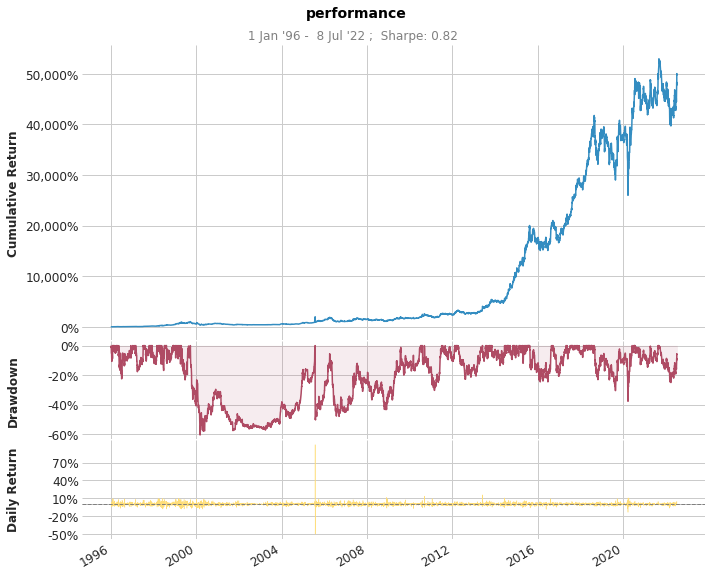

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               1996-01-02
End Period                 2022-07-08
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          49,857.00%
CAGR﹪                     26.39%

Sharpe                     0.82
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.72
Sortino                    1.44
Smart Sortino              1.26
Sortino/√2                 1.02
Smart Sortino/√2           0.89
Omega                      1.21

Max Drawdown               -60.49%
Longest DD Days            2134
Volatility (ann.)          36.13%
Calmar                     0.44
Skew                       11.45
Kurtosis                   592.65

Expected Daily %           0.09%
Expected Monthly %         1.97%
Expected Yearly %          25.88%
Kelly Criterion            8.53%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.63%
Expected Shortfall (cVaR)  -3.

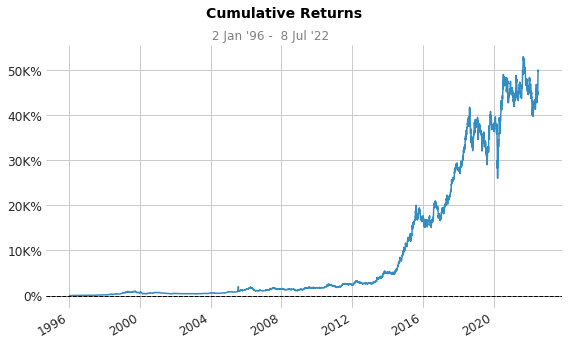

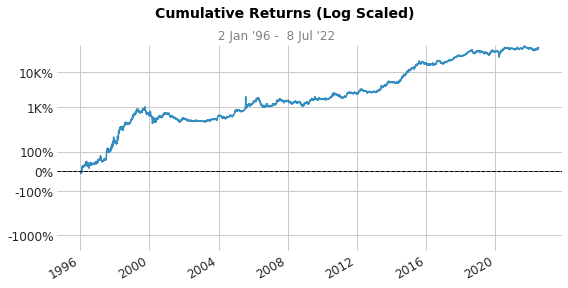

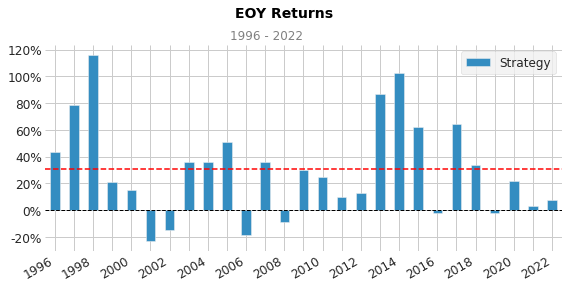

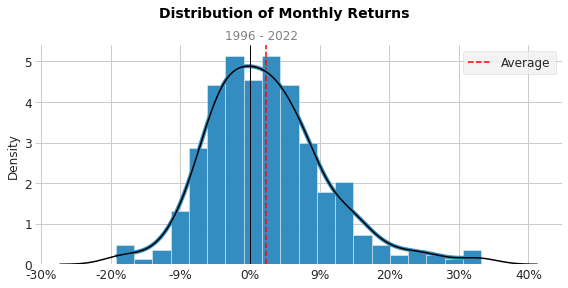

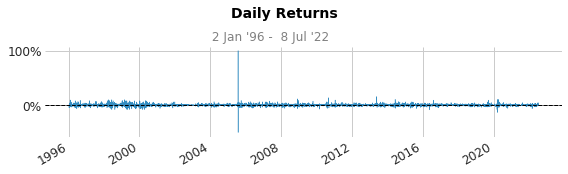

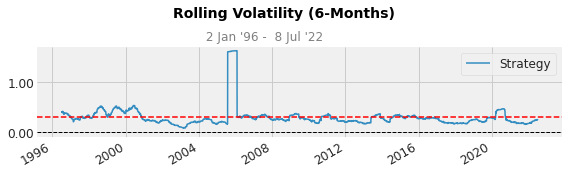

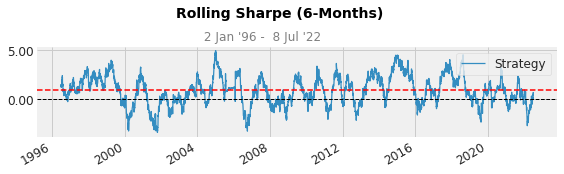

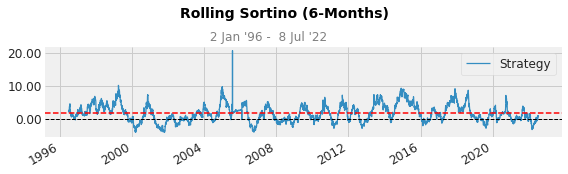

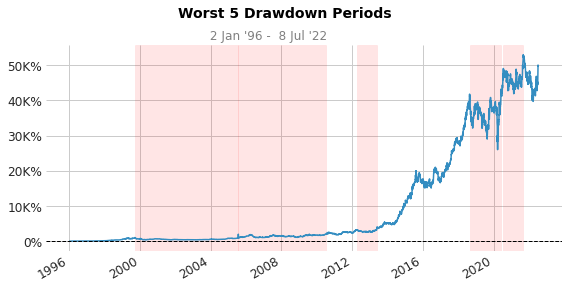

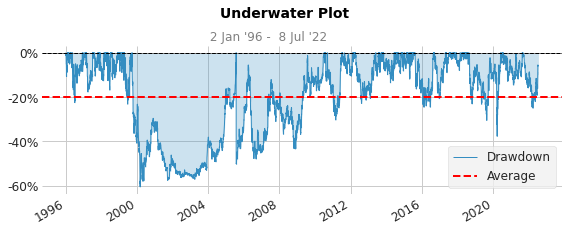

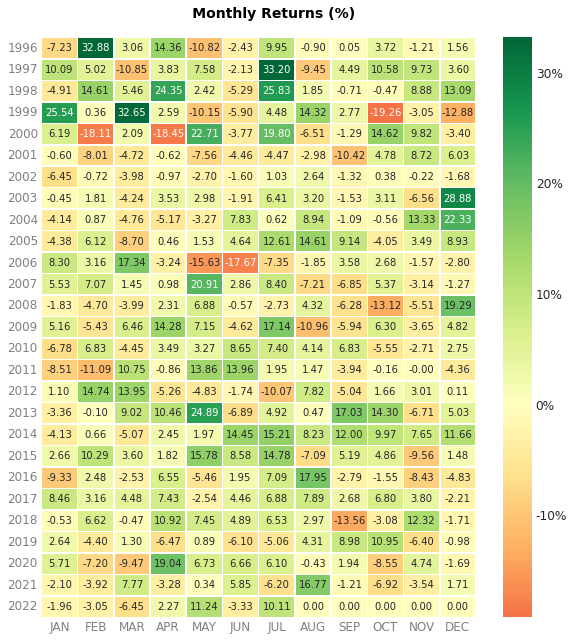

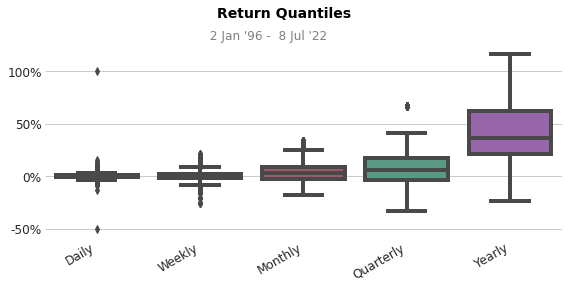

In [ ]:
stocks2= qs.utils.download_returns("BRITANNIA.NS")
qs.plots.snapshot(stocks2,title="performance")
qs.reports.full(stocks2,display=True)


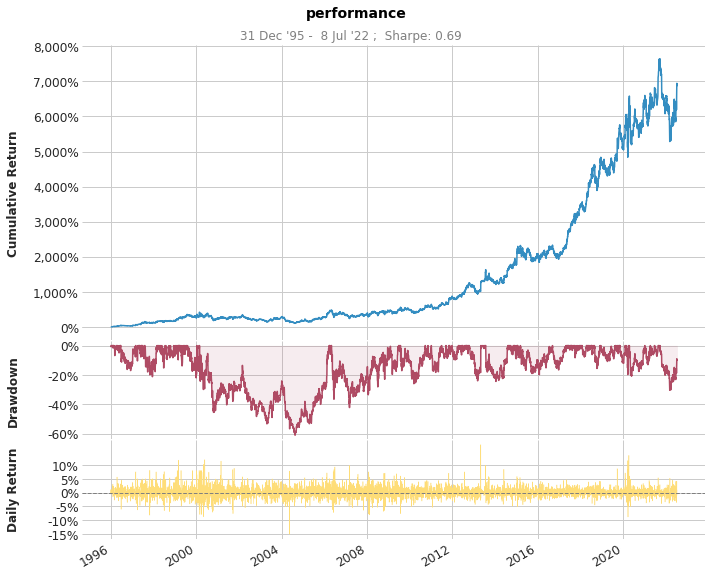

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               1996-01-01
End Period                 2022-07-08
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          6,940.21%
CAGR﹪                     17.39%

Sharpe                     0.69
Prob. Sharpe Ratio         99.98%
Smart Sharpe               0.68
Sortino                    1.06
Smart Sortino              1.05
Sortino/√2                 0.75
Smart Sortino/√2           0.75
Omega                      1.13

Max Drawdown               -60.94%
Longest DD Days            2219
Volatility (ann.)          29.56%
Calmar                     0.29
Skew                       0.55
Kurtosis                   5.55

Expected Daily %           0.06%
Expected Monthly %         1.34%
Expected Yearly %          17.07%
Kelly Criterion            5.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.98%
Expected Shortfall (cVaR)  -2.98%


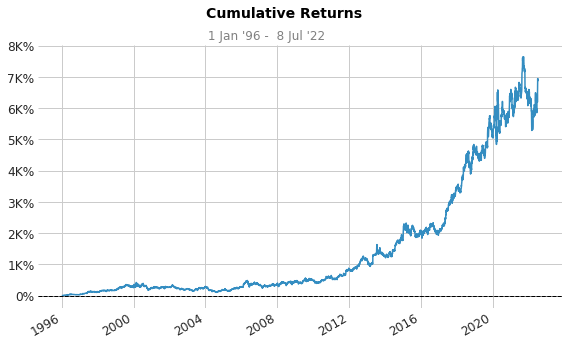

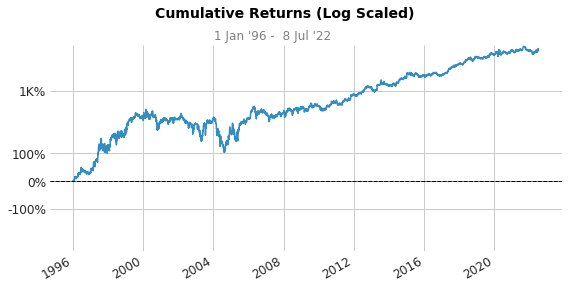

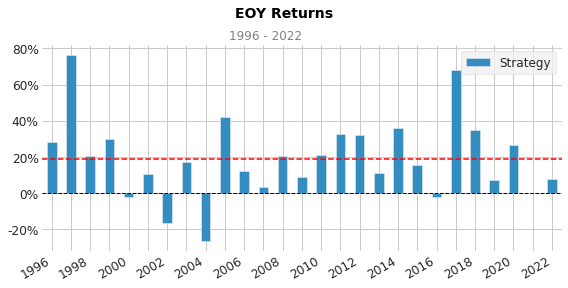

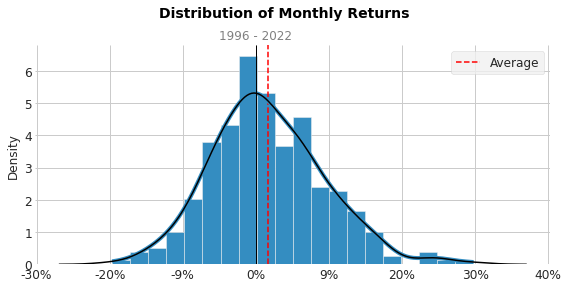

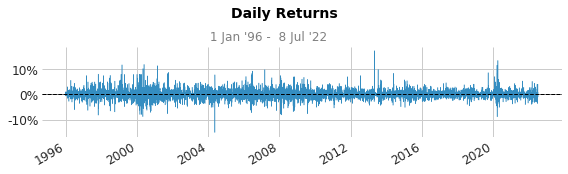

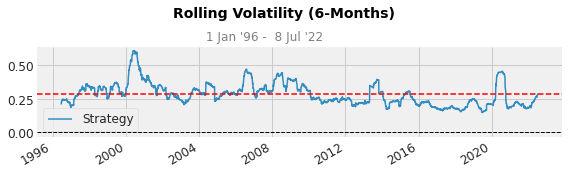

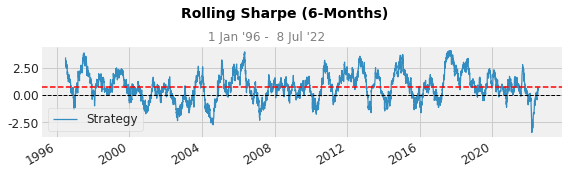

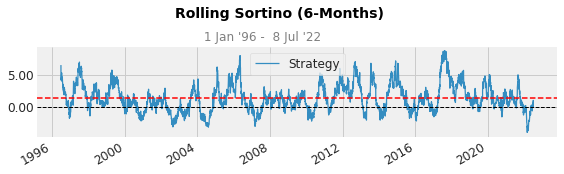

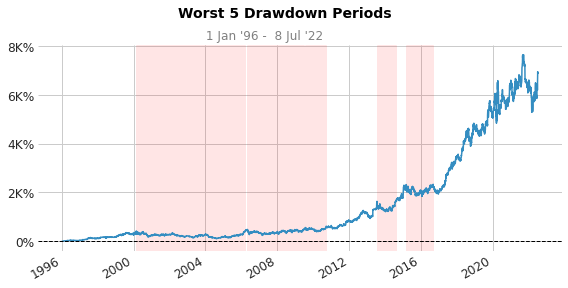

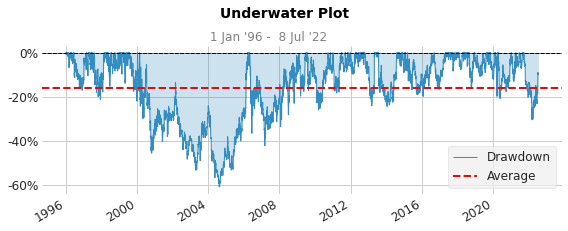

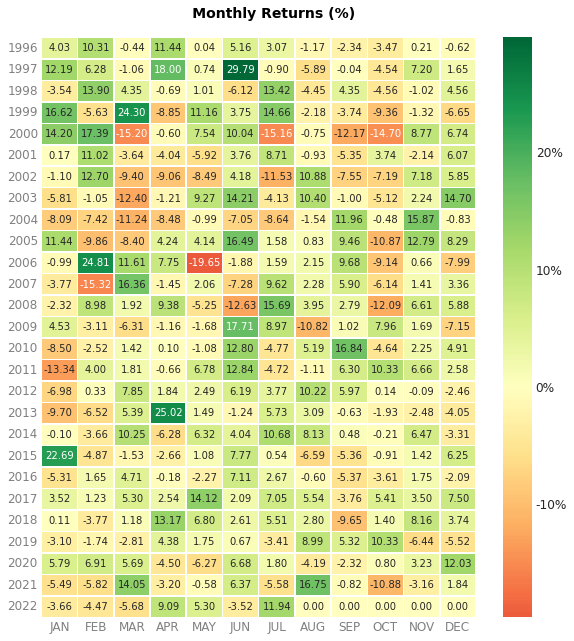

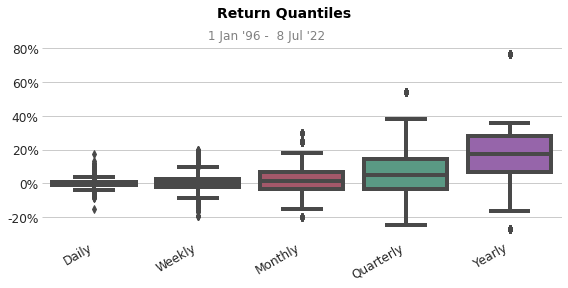

In [ ]:
stocks3= qs.utils.download_returns("HINDUNILVR.NS")
qs.plots.snapshot(stocks3,title="performance")
qs.reports.full(stocks3,display=True)


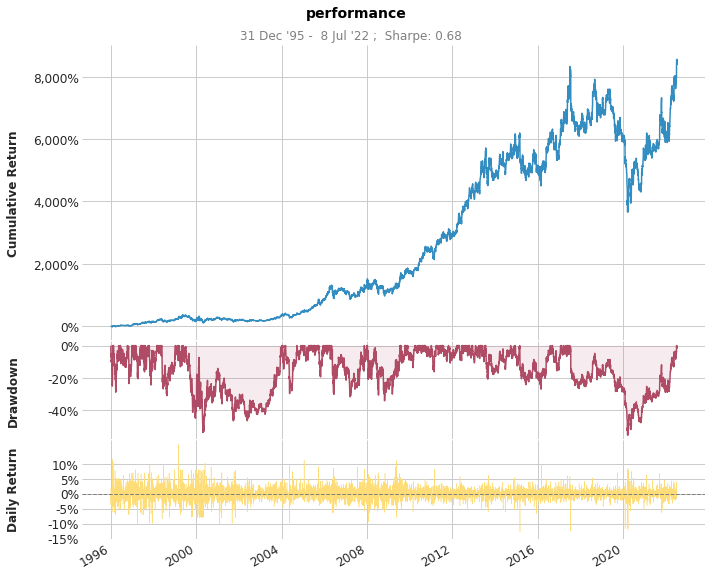

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               1996-01-01
End Period                 2022-07-08
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          8,579.55%
CAGR﹪                     18.32%

Sharpe                     0.68
Prob. Sharpe Ratio         99.98%
Smart Sharpe               0.67
Sortino                    1.01
Smart Sortino              1.0
Sortino/√2                 0.71
Smart Sortino/√2           0.71
Omega                      1.13

Max Drawdown               -55.35%
Longest DD Days            1826
Volatility (ann.)          32.99%
Calmar                     0.33
Skew                       0.16
Kurtosis                   4.6

Expected Daily %           0.07%
Expected Monthly %         1.41%
Expected Yearly %          17.98%
Kelly Criterion            5.9%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.33%
Expected Shortfall (cVaR)  -3.33%

Ma

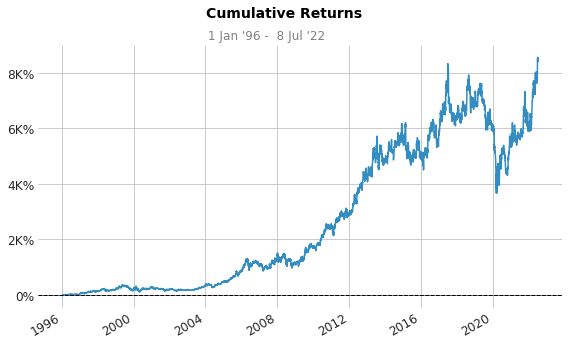

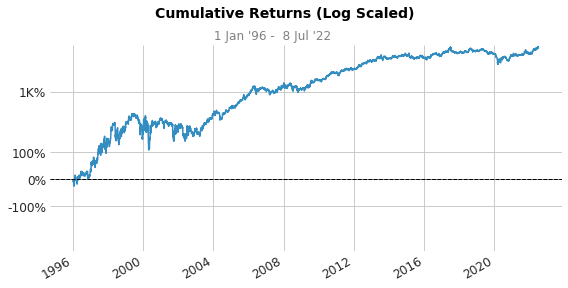

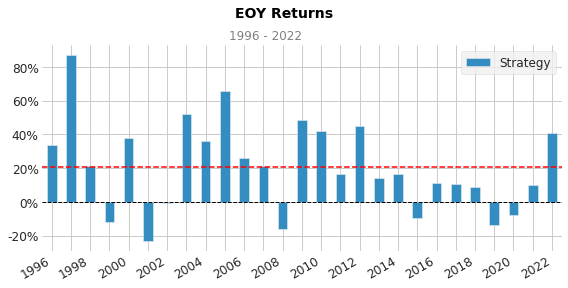

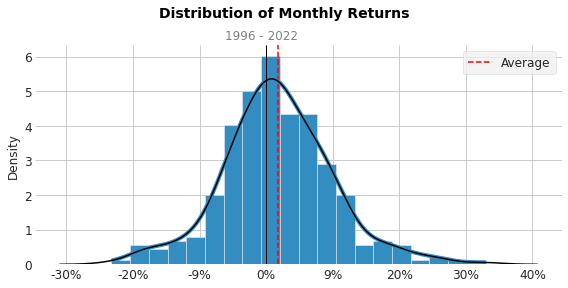

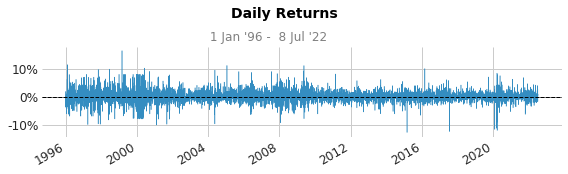

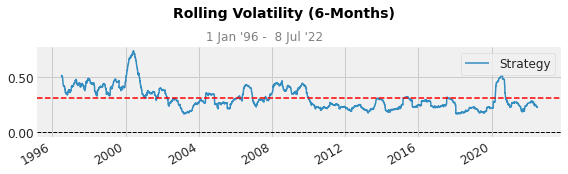

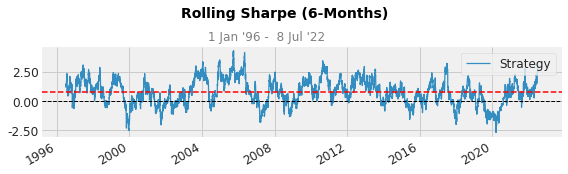

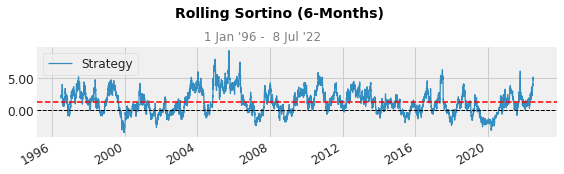

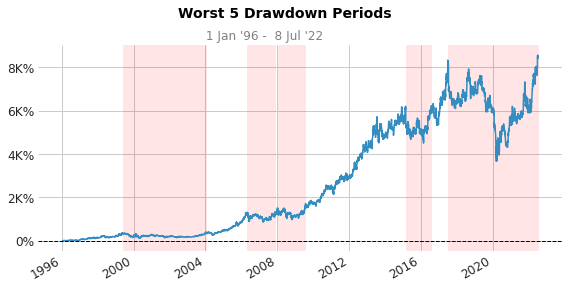

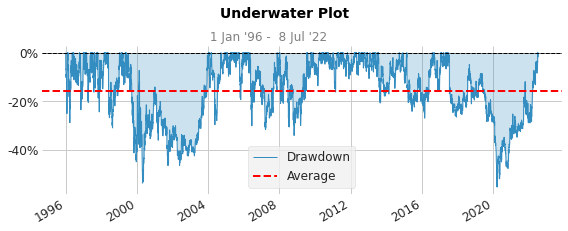

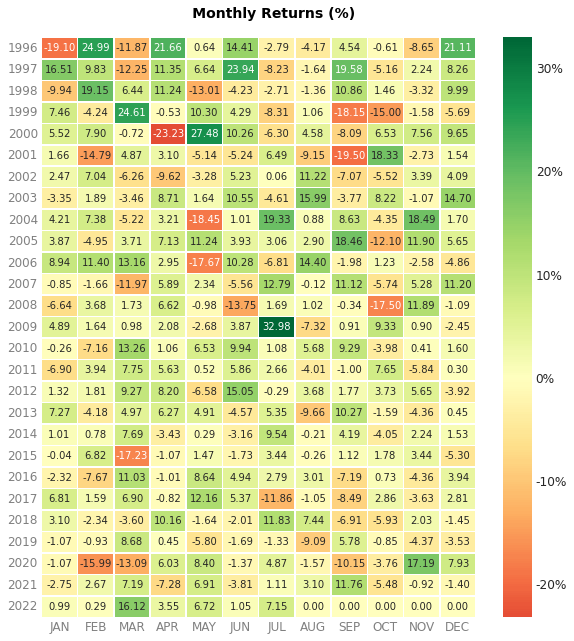

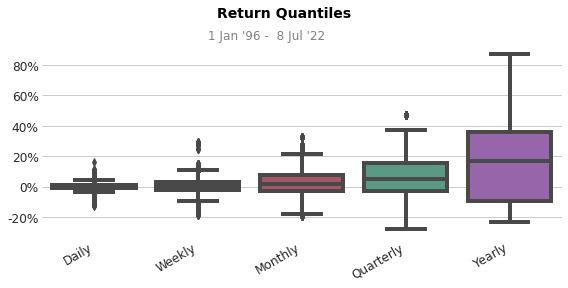

In [ ]:
stocks4= qs.utils.download_returns("ITC.NS")
qs.plots.snapshot(stocks4,title="performance")
qs.reports.full(stocks4,display=True)


#BALANCE SHEET

In [ ]:
 
bl1=T1.balancesheet
bl1.style.format("{:.1f}")

In [ ]:
bl2=T2.balancesheet
bl2.style.format("{:.1f}")

In [ ]:
bl3=T3.balancesheet
bl3.style.format("{:.1f}")

In [ ]:
bl4=T4.balancesheet
bl4.style.format("{:.1f}")


#ITC LSTM

In [ ]:
# Create a new dataframe with only the 'Close column 
data = ITC.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

5671

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414141],
       [0.0035174 ],
       [0.00300835],
       ...,
       [0.8505843 ],
       [0.85383561],
       [0.85753036]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00414141, 0.0035174 , 0.00300835, 0.00329736, 0.00301492,
       0.00254199, 0.00250258, 0.00245331, 0.00253213, 0.00267993,
       0.002519  , 0.00247302, 0.00246973, 0.00228582, 0.00165196,
       0.00155344, 0.00069297, 0.00012808, 0.        , 0.        ,
       0.00069297, 0.00150746, 0.00098855, 0.00181946, 0.00344515,
       0.00425307, 0.00409543, 0.00385239, 0.00555691, 0.00614807,
       0.00556676, 0.00599371, 0.00656516, 0.00675236, 0.00618419,
       0.00617762, 0.00536314, 0.00536314, 0.00579665, 0.00556347,
       0.00560617, 0.00555034, 0.00544853, 0.00432532, 0.00461105,
       0.00468002, 0.00468002, 0.00466031, 0.00444684, 0.00420052,
       0.0037473 , 0.00328094, 0.00452238, 0.00441071, 0.00421037,
       0.00305104, 0.00267993, 0.00267993, 0.00310359, 0.0022267 ])]
[0.001241436612168698]

[array([0.00414141, 0.0035174 , 0.00300835, 0.00329736, 0.00301492,
       0.00254199, 0.00250258, 0.00245331, 0.00253213, 0.00267993,
       0.002519  , 0.00247302, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Epoch 1/2
2806/2806 [==============================] - 190s 65ms/step - loss: 5.0024e-04
Epoch 2/2
2806/2806 [==============================] - 169s 60ms/step - loss: 2.4976e-04


In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.786659882317219

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


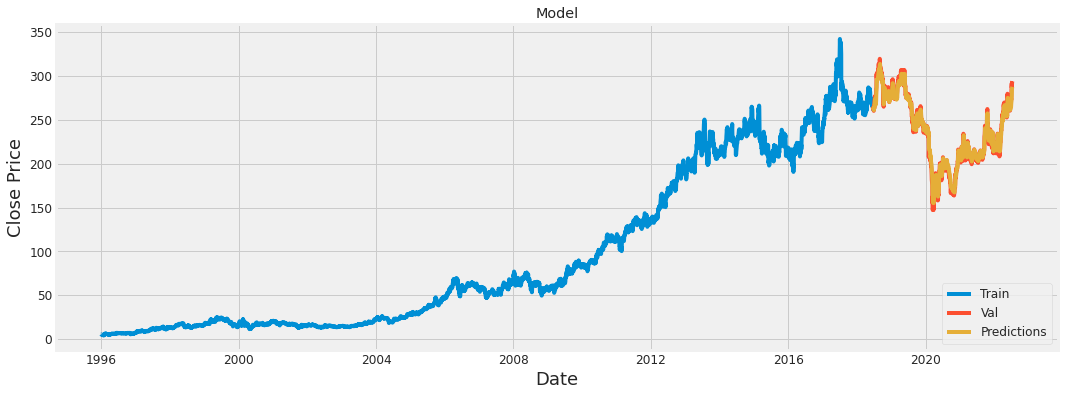

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Close  Predictions
Date                               
2018-06-22  265.149994   262.011139
2018-06-25  262.600006   263.105225
2018-06-26  264.799988   262.767059
2018-06-27  262.750000   263.536713
2018-06-28  260.500000   262.971863
...                ...          ...
2022-07-05  286.899994   284.293854
2022-07-06  289.299988   284.950409
2022-07-07  291.950012   285.367767
2022-07-08  293.049988   286.650818
2022-07-11  294.299988   287.854828

[1000 rows x 2 columns]

In [ ]:
x_train.shape

(5611, 60, 1)

In [ ]:

from sklearn.metrics import r2_score
print(f'R2 {r2_score(y_test, predictions)}')

R2 0.9854652231567119


KeyError: ignored

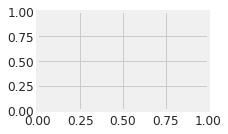

In [ ]:
plt.subplot(2, 2, 1)
valid["val"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("Validated data")

plt.subplot(2, 2, 2)
valid["Predictions"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("predicted data")

#RELIANCE LSTM

In [ ]:
data = RELIANCE.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

5672

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00143405],
       [0.00138997],
       [0.00143267],
       ...,
       [0.84624065],
       [0.84741582],
       [0.85279342]])

In [ ]:

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00143405, 0.00138997, 0.00143267, 0.00138032, 0.00134175,
       0.00111858, 0.0009643 , 0.00083067, 0.00098909, 0.00093399,
       0.00088027, 0.00088991, 0.00068603, 0.00054965, 0.00046562,
       0.00054552, 0.00034301, 0.00018597, 0.        , 0.        ,
       0.00033337, 0.00074389, 0.00063506, 0.00083067, 0.00138032,
       0.00184732, 0.00133762, 0.00144094, 0.00193686, 0.00229503,
       0.00188589, 0.0022537 , 0.00225783, 0.00215452, 0.00204155,
       0.00210492, 0.00177017, 0.00177017, 0.00208701, 0.00201951,
       0.00203329, 0.00196166, 0.00199196, 0.00160211, 0.00163517,
       0.00157456, 0.00157456, 0.00178119, 0.00183492, 0.00180324,
       0.00182252, 0.00213385, 0.00202502, 0.00202365, 0.00181839,
       0.00154288, 0.00118746, 0.00118746, 0.00157594, 0.00134037])]
[0.0013073114465831977]

[array([0.00143405, 0.00138997, 0.00143267, 0.00138032, 0.00134175,
       0.00111858, 0.0009643 , 0.00083067, 0.00098909, 0.00093399,
       0.00088027, 0.00088991, 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
176/176 [==============================] - 20s 96ms/step - loss: 4.3468e-04
Epoch 2/50
176/176 [==============================] - 16s 94ms/step - loss: 3.8204e-05
Epoch 3/50
176/176 [==============================] - 17s 94ms/step - loss: 3.2562e-05
Epoch 4/50
176/176 [==============================] - 16s 90ms/step - loss: 3.1532e-05
Epoch 5/50
176/176 [==============================] - 17s 94ms/step - loss: 2.9020e-05
Epoch 6/50
176/176 [==============================] - 16s 94ms/step - loss: 2.4711e-05
Epoch 7/50
176/176 [==============================] - 17s 95ms/step - loss: 2.4740e-05
Epoch 8/50
176/176 [==============================] - 16s 92ms/step - loss: 2.5915e-05
Epoch 9/50
176/176 [==============================] - 16s 92ms/step - loss: 2.5333e-05
Epoch 10/50
176/176 [==============================] - 17s 95ms/step - loss: 2.5926e-05
Epoch 11/50
176/176 [==============================] - 16s 89ms/step - loss: 2.2304e-05
Epoch 12/50
176/176 [====================

In [ ]:


test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

41.829824017320504

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 {r2_score(y_test, predictions)}')

R2 0.9936890941412049


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


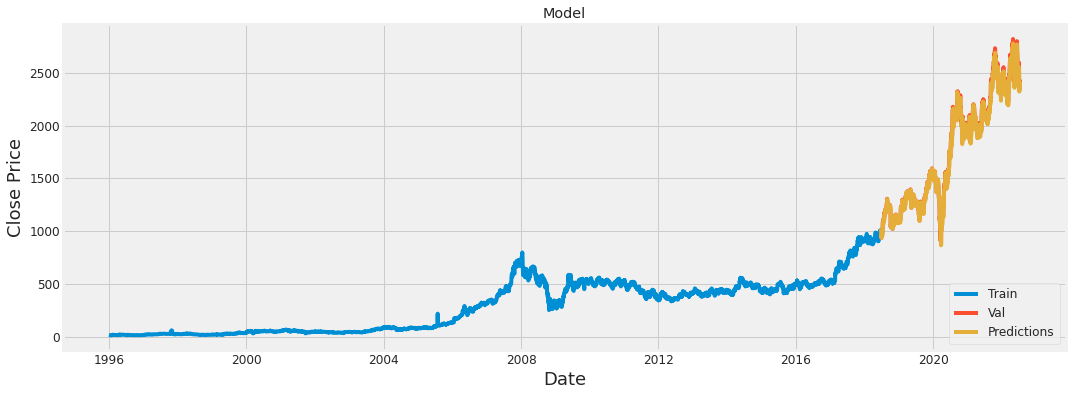

In [ ]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Close  Predictions
Date                                
2018-06-22  1002.992615  1021.517517
2018-06-25   995.018250   998.719177
2018-06-26   969.757690   991.920532
2018-06-27   956.780701   966.300598
2018-06-28   936.076904   955.357849
...                 ...          ...
2022-07-05  2433.250000  2381.952148
2022-07-06  2411.850098  2409.342773
2022-07-07  2388.100098  2376.931641
2022-07-08  2391.399902  2352.201416
2022-07-11  2406.500000  2361.613525

[1000 rows x 2 columns]

Text(0.5, 1.0, 'predicted data')

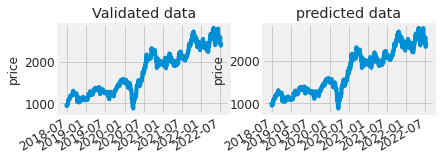

In [ ]:
plt.subplot(2, 2, 1)
valid["Close"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("Validated data")

plt.subplot(2, 2, 2)
valid["Predictions"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("predicted data")

Text(0.5, 1.0, 'predicted data')

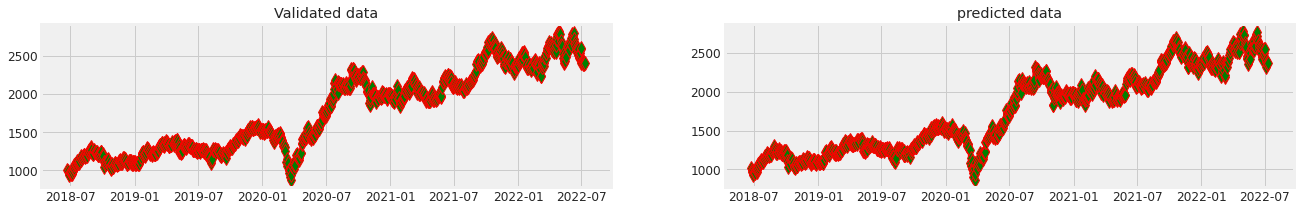

In [ ]:
plt.figure(figsize=(20,100))
plt.subplots_adjust(top=1.25, bottom=1.2)

plt.subplot(2, 2,1)
plt.plot(valid["Close"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("Validated data")

plt.subplot(2, 2,2)
plt.plot(valid["Predictions"],c="red",marker="d", markerfacecolor='green',markersize="10")
plt.ylabel('')
plt.xlabel(None)
plt.title("predicted data")

#BRITANNIA LSTM

In [ ]:

data = BRITANNIA.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=2, epochs=5)

In [ ]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
print(f'R2 {r2_score(y_test, predictions)}')

In [ ]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

In [ ]:
plt.subplot(2, 2, 1)
valid["val"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("Validated data")

plt.subplot(2, 2, 2)
valid["Predictions"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("predicted data")

#HINDUSTAN_UNILIVER LSTM

In [ ]:
HINDUSTAN_UNILIVER

In [ ]:

data = HINDUSTAN_UNILIVER.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=5)

In [ ]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

In [ ]:
print(f'R2 {r2_score(y_test, predictions)}')

In [ ]:
plt.subplot(2, 2, 1)
valid["val"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("Validated data")

plt.subplot(2, 2, 2)
valid["Predictions"].plot()
plt.ylabel('price')
plt.xlabel(None)
plt.title("predicted data")

In [ ]:
pip install mitosheet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 7.4 MB/s 
     |████████████████████████████████| 243 kB 50.4 MB/s 
     |████████████████████████████████| 149 kB 67.3 MB/s 
     |████████████████████████████████| 8.8 MB 44.8 MB/s 
     |████████████████████████████████| 9.7 MB 40.3 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 423 kB 37.1 MB/s 
     |████████████████████████████████| 344 kB 45.7 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 132 kB 59.9 MB/s 
     |████████████████████████████████| 563 kB 43.8 MB/s 
     |████████████████████████████████| 133 kB 48.0 MB/s 
     |████████████████████████████████| 106 kB 49.6 MB/s 
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstall

In [ ]:
import mitosheet

AttributeError: ignored